In [79]:
from google.colab import drive
drive.mount('/content/drive')
!pip install japanize-matplotlib
import japanize_matplotlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

img = cv2.imread('/content/drive/MyDrive//pro/DarkImg01.jpg')
img2 = cv2.imread('/content/drive/MyDrive//pro/DarkImg02.jpg')
img3 = cv2.imread('/content/drive/MyDrive//pro/DarkImg03.jpg')
img4 = cv2.imread('/content/drive/MyDrive//pro/DarkImg04.jpg')
img5 = cv2.imread('/content/drive/MyDrive//pro/DarkImg05.jpg')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
#vだけ
def hase_img(img,e):
  grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  grayimg2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  img2=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  gamma = 2.0
  lookup_table = np.zeros(256, np.float32)
  for i in range(0, 256):
    lookup_table[i] = 255.0*pow(float(i)/255.0, 1.0/gamma)
  output_color=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  h, s, v = cv2.split(output_color)
  grayimg[:,:,2] =cv2.LUT(v,lookup_table)   
  img_bgr = cv2.cvtColor(grayimg, cv2.COLOR_HSV2BGR)
  img_rgb=cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
  hist = cv2.calcHist([img], [2], None, [256], [0,256])
  data_x = np.zeros(256)
  data_y = np.zeros(256)
  for i in range(0, 256):
    data_x[i] = i
    data_y[i] = hist[i]
  hist = cv2.calcHist([grayimg], [2], None, [256], [0,256])
  data_x1 = np.zeros(256)
  data_y1 = np.zeros(256)
  for i in range(0, 256):
    data_x1[i] = i
    data_y1[i] = hist[i]
  cv2.imwrite(f'/content/drive/MyDrive/pro/H{e}.jpg',img_bgr)
  return [img_rgb,data_x,data_y,data_x1,data_y1,img2]

In [83]:
result1 = hase_img(img,1)
result2 = hase_img(img2,2)
result3 = hase_img(img3,3)
result4 = hase_img(img4,4)
result5 = hase_img(img5,5)



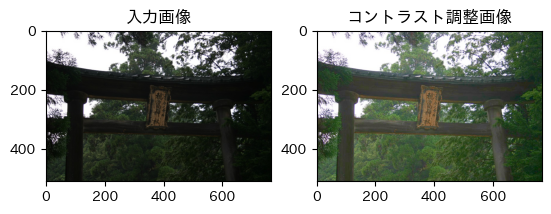

In [84]:
fig=plt.figure()
fig.add_subplot(1,2,1).set_title("入力画像")
plt.imshow(result1[5])
fig.add_subplot(1,2,2).set_title("コントラスト調整画像")
plt.imshow(result1[0])

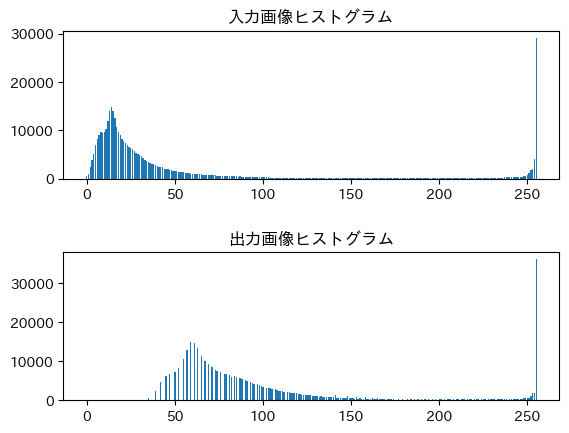

In [85]:
fig=plt.figure()
fig.add_subplot(2,1,1).set_title("入力画像ヒストグラム")
plt.bar(result1[1],result1[2])
fig.add_subplot(2,1,2).set_title("出力画像ヒストグラム")
plt.bar(result1[3],result1[4])
fig.subplots_adjust(hspace = 0.5)